In [1]:
from IPython.html.services.config import ConfigManager
from IPython.utils.path import locate_profile
cm = ConfigManager(profile_dir=locate_profile(get_ipython().profile))
cm.update('livereveal', {
              'theme': 'sky',
              'transition': 'zoom',
              'start_slideshow_at': 'selected',
})

/home/ivan/miniconda2/lib/python2.7/site-packages/IPython/html.py:14: ShimWarning: The `IPython.html` package has been deprecated. You should import from `notebook` instead. `IPython.html.widgets` has moved to `ipywidgets`.
  "`IPython.html.widgets` has moved to `ipywidgets`.", ShimWarning)
/home/ivan/miniconda2/lib/python2.7/site-packages/IPython/utils/path.py:282: UserWarning: locate_profile has moved to the IPython.paths module
  warn("locate_profile has moved to the IPython.paths module")


{u'scroll': True,
 u'start_slideshow_at': 'selected',
 u'theme': 'sky',
 u'transition': 'zoom'}

# Lecture 7. Properties of hierarchical matrices

## Previous lecture
We talked about:

- A little bit on FMM from algebra part & estimates
- Adaptive cross approximation & maxvol algorithm

## Todays lecture
- Working with H- and H-2 matrices: addition, multiplication, inversion
- Connection to sparse matrices

## H-matrix: definition

A dense matrix $A$ is called **hierarhical matrix** with respect to the cluster trees $T$ and $S$ for rows/columns, 

if 

$$A(t, s) = U(t, s) V(t, s), \quad t \in T, \quad s \in S.$$

## Properties of the H-matrix

- Storage is $\mathcal{O}(N \log N)$ 
- Complexity of matrix-by-vector product is $\mathcal{O}(N \log N)$ 
- Computation of the representation is reduced to the blockwise approximation (approximate many blocks independently via cross approximation algorithms).

## Where H-matrices come from
- Approximation of integral operators
- As inverses of sparse matrices (?)

## Model example: inverse of the tridiagonal matrix

H-matrices are connected with sparse matrices.

Sparse matrices come from the solution of PDEs.

Consider a tridiagonal matrix.

$$A = D + D_1 Z + D_2 Z^{\top},$$

where $Z$ is a **lower-shift matrix**.

Tridiagonal matrix is an H-matrix with H-ranks equal to $1$.

## Tridiagonal matrix and it LU

Tridiagonal matrix and LU.

It is well-known, that tridiagonal matrix can be factorized into a product of **lower triangular** bidiagonal matrix, and **upper triangular** bidiagonal matrix.

$$A = LU.$$

## Numerical experiment

(array([[ 1.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ],
       [-0.11747356, -0.4428057 ,  0.64466151, -0.6366489 ,  1.        ,
         0.        ,  0.        ,  0.        ],
       [ 0.        ,  1.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ],
       [ 0.        , -0.        ,  1.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ],
       [ 0.        , -0.        , -0.        ,  1.        ,  0.        ,
         0.        ,  0.        ,  0.        ],
       [ 0.        , -0.        , -0.        , -0.        ,  0.46941472,
         1.        ,  0.        ,  0.        ],
       [ 0.        , -0.        , -0.        , -0.        ,  0.        ,
        -0.05340742,  1.        ,  0.        ],
       [ 0.        , -0.        , -0.        , -0.        ,  0.        ,
         0.        ,  0.40765598,  1.        ]]), array([[ 0.43823653, -0.40375

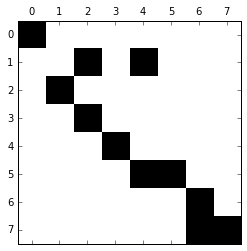

In [13]:
import numpy as np
import scipy.linalg as spla
import matplotlib.pyplot as plt
%matplotlib inline

n = 8

d1 = np.random.randn(n)
d2 = np.random.randn(n-1)
d3 = np.random.randn(n-1)

A = np.diag(d1) + np.diag(d2, 1) + np.diag(d3, -1)

Q = spla.lu(A, permute_l=True)
print Q
Q1 = Q[0]
Q1[np.abs(Q1 < 1e-8)] = 0
plt.spy(Q1)

## LU-factorization

The LU factorization has structure, what can we say about the inverse of the matrix?

We have $$ A = LU, $$

thus

$$A^{-1} = U^{-1} L^{-1}.$$

thus solving a linear system is reduced to the solution of two linear systems, one with the matrix $L$ another with the matrix $U$,

each one can be done in $\mathcal{O}(N)$ operations.

## Exact inverse for the tridiagonal matrix

The inverses $U^{-1}$ and $L^{-1}$ are (typically) dense:

## Numerical experiment

Let us do a short numerical experiment

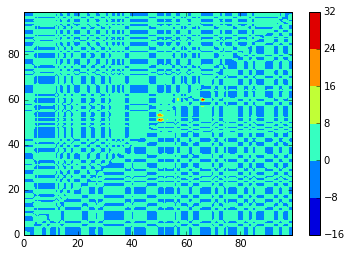

In [19]:
import numpy as np

n = 100

d1 = np.random.randn(n)
d2 = np.random.randn(n-1)
d3 = np.random.randn(n-1)

A = np.diag(d1) + np.diag(d2, 1) + np.diag(d3, -1)
iA = np.linalg.inv(A)
plt.contourf(iA)
plt.colorbar()

## The inverse is H-matrix

But the inverse of a tridiagonal matrix is an H-matrix!

In [22]:
import numpy as np

n = 100

d1 = np.random.randn(n)
d2 = np.random.randn(n-1)
d3 = np.random.randn(n-1)

A = np.diag(d1) + np.diag(d2, 1) + np.diag(d3, -1)
iA = np.linalg.inv(A)

iA01 = iA[:n/2, n/2:]
iA10 = iA[n/2:, :n/2]

np.linalg.svd(iA01)[1]

array([  1.02091926e+00,   2.42640688e-16,   1.40948324e-16,
         1.16422070e-16,   9.37753890e-17,   9.37753890e-17,
         9.37753890e-17,   9.37753890e-17,   9.37753890e-17,
         9.37753890e-17,   9.37753890e-17,   9.37753890e-17,
         9.37753890e-17,   9.37753890e-17,   9.37753890e-17,
         9.37753890e-17,   9.37753890e-17,   9.37753890e-17,
         9.37753890e-17,   9.37753890e-17,   9.37753890e-17,
         9.37753890e-17,   9.37753890e-17,   9.37753890e-17,
         9.37753890e-17,   9.37753890e-17,   9.37753890e-17,
         9.37753890e-17,   9.37753890e-17,   9.37753890e-17,
         9.37753890e-17,   9.37753890e-17,   9.37753890e-17,
         9.37753890e-17,   9.37753890e-17,   9.37753890e-17,
         9.37753890e-17,   9.37753890e-17,   9.37753890e-17,
         9.37753890e-17,   9.37753890e-17,   9.37753890e-17,
         9.37753890e-17,   9.37753890e-17,   9.37753890e-17,
         9.37753890e-17,   9.37753890e-17,   9.37753890e-17,
         9.37753890e-17,

## Tridiagonal matrix and its inverse

Let $A$ be a tridiagonal matrix of size $2n \times 2n$. Then,

$$A^{-1} = \begin{bmatrix} A_{00} & A_{01} \\
A_{10} & A_{11}  
\end{bmatrix},
$$

where $A_{ij}$ has size $n \times n$

and 

$$\mathrm{rank}~A_{01} \leq 1, \quad \mathrm{rank}~A_{10} \leq 1.$$

## How to prove it: Nullity theorem

The very nice proof can be based on so-called **nullity theorem** (for details, see [The Interplay of the ranks of the submatrices](http://www-math.mit.edu/~gs/papers/IRS.pdf) by G. Strang, T. Nguen)

**Nulllity theorem:**

Complementary submatrices of $A$ and $A^{-1}$ have the same **nullity**

Nullity is the dimension of the kernel of the matrix.

Complementary submatrix is the one that have rows not contained in the original one, and columns not contained in the original one.

## Nullity theorem: proof

Let 

$$\begin{bmatrix} A & * \\
* & * \end{bmatrix}^{-1} = \begin{bmatrix} * & * \\ * & D \end{bmatrix}, \quad \mathrm{nullity}(A) = \mathrm{nullity}(D).$$

Anny permutations of row/columns in the original matrix will put the complementary in the same place, so it is enough to prove for the left-to-corner case.



## Nullity theorem: proof(2)

Let $2 \times 2$ block matrix $T$ have block $T_{11} = A$ and its inverse have $T^{-1}_{22} = D$.

Let the columns of $N$ be the basis for the nullspace of $A$,

$$AN = 0.$$

Then, the second block row of $T^{-1} T = I$ gives

$$T^{-1}_{21} A + D T_{21} = 0.$$

If we multiply this equation by $N$ from the right we have

$$
   T^{-1}_{21} A N + DT_{21} N = D T_{21} N = 0.
$$

We only need to prove that the columns of $T_{21} N$ are linearly independent.

Suppose that $y$ is such that

$$
   T_{21} N y = 0.
$$

Then, multiplying $T$ by 
$$
\begin{bmatrix} Ny \\ 0 \end{bmatrix},
$$
we get the zero vector.

Thus, since $T$ is invertible, we get $N y = 0$, and since the columns of $N$ are linearly independent we get $y = 0$.

## Ranks of the submatrices of the inverse


Let $B$ be the **banded matrix** (tridiagonal matrix is a banded matrix with bandwidth $1$).

Then, the general theorem says:

Every submatrix $B$ above the $p$-th diagonal of the matrix $T$ has $\mathrm{rank}(B) < k$ IFF (if and only if) 

every submatrix $C$ above the $p$-th diagonal of the matrix $T^{-1}$ has $\mathrm{rank}(C) < p + k$.

## Proof



## Tridiagonal matrix as an H-matrix

## Computing the inverse of the H-matrix

## Block LU-decomposition

## Hierarhical algorithm for the inversion of the H-matrix

Deriving the Schur decomposition formula.

## Block inversion and Schur complement

## Necessary operations during the inversions

We need addition of H-matrices, multiplication of H-matrices, multiplication of H-matrices by low-rank matrices.

## Addition of H-matrices

## Adding low-rank matrices 

The result has larger rank

## Compressing (rounding) low-rank matrices

We can do it faster than SVD

## Recalling QR decomposition

Every matrix can be decomposed into a product

## Complexity analysis of the QR/rounding scheme

The complexity is linear

## Multiplication of two H-matrices

Block formula again

## Dense H-matrix by low-rank matrix product

## Algorithm summary

## Factorizing H-matrices

We can also try to factorize H-matrices into the product of lower-triangular and upper-triangular matrices

## Block LU factorizations

## What are the problems 

## What are the alternatives for sparse matrices

- Incomplete LU factorizations
- Algebraic/geometric multigrid methods
- Domain decompositions
- (Mixed) fast direct solvers.

## Note on H2-matrices

Direct analogue of FMM, storing only the **transfer matrices**

## Inversion/factorization of H2-matrices

It is all reduced to matrix-by-matrix product

## Computing products of H2-matrices

## Summary


## Next lecture

In [4]:
from IPython.core.display import HTML
def css_styling():
    styles = open("./styles/custom.css", "r").read()
    return HTML(styles)
css_styling()